<img src = "https://imgur.com/HE0kDhA.jpg"  align = "center">

# **Soal Praktikum Artificial Neural Network**

Pada soal kali ini anda diminta untuk membuat model NN untuk melakukan klasifikasi dari dataset gambar sell darah dengan kasus penyakit Malaria.
dataset: https://ceb.nlm.nih.gov/proj/malaria/cell_images.zip

Dataset berikut merupakan kumpulan gambar sel darah yang sudah disegmentasi berjumlah 27,558 gambar cell, dimana label yang dimiliki ada 2 jenis yaitu sel darah yang terinfeksi sel parasit (Parasitized), dan sel darah tidak terinfeksi parasit (Uninfected)

Total point jika dikerjakan keseluruhan 100 dan tambahan opsional bonus 15 jika model akurasi klasifikasi report dihasilkan diatas 80%

# 1. Load Data (total point 40)

Task perlu dikerjakan:
1. Unduh dataset dan ekstraksi zip (10 point)
2. Splitting dataset yaitu dengan membuat folder gambar untuk memisahkan gambar tersebut 70% sebagai data training dan 30% sebagai data testing (15 point)
3. Cek penamaan image dan tampilkan jumlah gambar dari hasil splitting dari masing-masing kelas (5 point)
4. Tampilkan 4 image per label beserta judul label dengan ukuran 2 baris x 4 kolom (10 point)

Note:
Lakukan ekstraksi (unzip) pada dataset tersebut, perlu diketahui setelah dilakukan ekstrasi terdapat dua folder pada dataset tersebut bernama Parasitized dan Uninfected, dimana pada folder Parasitized berisi sel gambar yang terinfeksi, dan folder Uninfected berisi sel gambar yang tidak terinfeksi

In [ ]:
# Download dataset
!wget --no-check-certificate \
    https://ceb.nlm.nih.gov/proj/malaria/cell_images.zip \
    -O /tmp/cell_images.zip

--2020-10-18 16:30:15--  https://ceb.nlm.nih.gov/proj/malaria/cell_images.zip
Resolving ceb.nlm.nih.gov (ceb.nlm.nih.gov)... 130.14.52.15, 2607:f220:41e:7052::15
Connecting to ceb.nlm.nih.gov (ceb.nlm.nih.gov)|130.14.52.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 353452851 (337M) [application/zip]
Saving to: ‘/tmp/cell_images.zip’

/tmp/cell_images.zi 100%[===================>] 337.08M  43.0MB/s    in 8.3s    

2020-10-18 16:30:23 (40.6 MB/s) - ‘/tmp/cell_images.zip’ saved [353452851/353452851]



In [ ]:
import os
import zipfile

local_zip = '/tmp/cell_images.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

Sebelum melakukan splitting jalankan fungsi berikut untuk memastikan isi folder hanya berupa gambar png

In [ ]:
import os
base_dataset = "/tmp/cell_images"
class_dir = ['Parasitized','Uninfected']
for class_item in class_dir:
  cur_dir = base_dataset+"/"+class_item
  dataset = os.listdir(cur_dir)
  for item in dataset:
    if not item.endswith(".png"):
        os.remove(os.path.join(cur_dir, item))

Note: 
- Fungsi untuk mendapatkan jumlah train gambar
- train_len_func = lambda x: int(70/100*len(x))
- Folder baru untuk training dan validasi path untuk data train dan data validation
- base_dir = 'model_cell_images'

Hasil dari pemindahan sehingga membentuk directory struktur berikut
- model_cell_images/training/Parasitized/*file gambar training parasit
- model_cell_images/training/Uninfected/*file gambar training uninfected
- model_cell_images/validation/Parasitized/*file gambar validation parasit
- model_cell_images/validation/Uninfected/*file gambar validation uninfected

In [ ]:

# dataset_dir=['training','validation']
# os.mkdir(base_dir)
# for dsdirs in dataset_dir:
#   path1 = base_dir+"/"+dsdirs
#   os.mkdir(path1)
#   for classdir in class_dir:
#     path2 = path1+"/"+classdir
#     os.mkdir(path2)

In [ ]:
!pip install split-folders tqdm

In [ ]:
# Hasil pengerjaan point 1.2
import splitfolders
base_dir = '/tmp/model_cell_images'
splitfolders.ratio(base_dataset, output=base_dir, seed=1337, ratio=(.7,.3),group_prefix=None)

Copying files: 27558 files [00:04, 6708.64 files/s]


In [ ]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

train_parasitized_dir = os.path.join(train_dir, 'Parasitized')
train_uninfected_dir = os.path.join(train_dir, 'Uninfected')

validation_parasitized_dir = os.path.join(validation_dir, 'Parasitized')
validation_uninfected_dir = os.path.join(validation_dir, 'Uninfected')

In [ ]:
# Hasil pengerjaan point 1.3
print(os.listdir(train_parasitized_dir)[:10])
print(os.listdir(train_uninfected_dir)[:10])
print('total training cat images:', len(os.listdir(train_parasitized_dir)))
print('total training dog images:', len(os.listdir(train_uninfected_dir)))
print('total validation cat images:', len(os.listdir(validation_parasitized_dir)))
print('total validation dog images:', len(os.listdir(validation_uninfected_dir)))

['C68P29N_ThinF_IMG_20150819_133236_cell_144.png', 'C91P52ThinF_IMG_20150821_124311_cell_12.png', 'C180P141NThinF_IMG_20151201_163751_cell_173.png', 'C102P63ThinF_IMG_20150918_162511_cell_173.png', 'C156P117ThinF_IMG_20151115_155104_cell_261.png', 'C176P137NThinF_IMG_20151201_114235_cell_5.png', 'C63P24N_ThinF_IMG_20150818_143319_cell_165.png', 'C107P68ThinF_IMG_20150924_222233_cell_153.png', 'C129P90ThinF_IMG_20151004_133921_cell_110.png', 'C133P94ThinF_IMG_20151004_155012_cell_16.png']
['C211ThinF_IMG_20151029_164033_cell_61.png', 'C52P13thinF_IMG_20150725_125213_cell_166.png', 'C158P119ThinF_IMG_20151115_181436_cell_118.png', 'C177P138NThinF_IMG_20151201_143546_cell_135.png', 'C175P136NThinF_IMG_20151127_141253_cell_73.png', 'C98P59ThinF_IMG_20150917_153801_cell_64.png', 'C38P3thinF_original_IMG_20150621_112116_cell_129.png', 'C87P48ThinF_IMG_20150820_132514_cell_173.png', 'C150P111ThinF_IMG_20151115_115950_cell_53.png', 'C146P107ThinF_IMG_20151018_140342_cell_112.png']
total traini

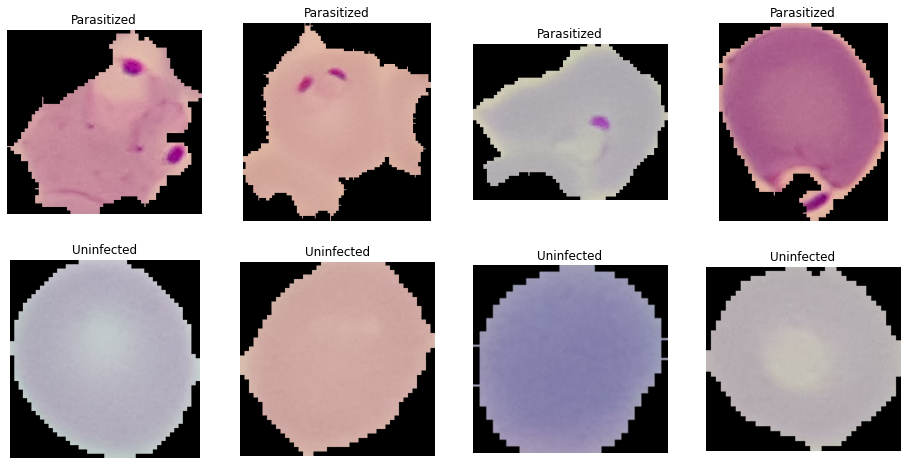

In [ ]:
# Hasil pengerjaan point 1.4
%matplotlib inline
 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
 
nrows = 2
ncols = 4
 
pic_index = 0
 
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
 
pic_index += 4
next_prst_pix = [os.path.join(train_parasitized_dir, fname) 
                for fname in os.listdir(train_parasitized_dir)[pic_index-4:pic_index]]
next_un_pix = [os.path.join(train_uninfected_dir, fname) 
                for fname in os.listdir(train_uninfected_dir)[pic_index-4:pic_index]]
 
for i, img_path in enumerate(next_prst_pix+next_un_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
  if img_path in next_prst_pix:
    sp.set_title("Parasitized")
  else:
    sp.set_title("Uninfected")
  img = mpimg.imread(img_path)
  plt.imshow(img)
 
plt.show()

# 2. Preprocessing (total point 20)

Task perlu dikerjakan:
1. Gather data train dan validation dengan ukuran gambar 100 x 100 (point 10)
2. Tampilkan shape dari data train dan data validation (point 5)
3. Normalisasi dataset, membuat dan menampilkan hasil dari label encoder (point 5)

In [ ]:
# Hasil pengerjaan point 2.1
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (100,100))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [ ]:
# Gather data validation
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (100,100))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [ ]:
# Hasil pengerjaan point 2.2
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (19290, 100, 100, 3)
Train Label =  (19290,)
Validation Data =  (8268, 100, 100, 3)
Validation Label =  (8268,)


In [ ]:
# Hasil pengerjaan point 2.3

Data sebelum di-normalisasi  [198 179 188]
Data setelah di-normalisasi  [0.7764706 0.7019608 0.7372549]
Label sebelum di-encoder  ['Parasitized' 'Parasitized' 'Parasitized' 'Parasitized' 'Parasitized'
 'Parasitized' 'Parasitized' 'Parasitized' 'Parasitized' 'Parasitized']
Label setelah di-encoder  [0 0 0 0 0 0 0 0 0 0]
Class label encoder ['Parasitized' 'Uninfected']


In [ ]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder
print("Label sebelum di-encoder ", train_label[9640:9650])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)
print("Label setelah di-encoder ", y_train[9640:9650])
print("Class label encoder ", lb.classes_)

Data sebelum di-normalisasi  [0 0 0]
Data setelah di-normalisasi  [0. 0. 0.]
Label sebelum di-encoder  ['Parasitized' 'Parasitized' 'Parasitized' 'Parasitized' 'Parasitized'
 'Uninfected' 'Uninfected' 'Uninfected' 'Uninfected' 'Uninfected']
Label setelah di-encoder  [0 0 0 0 0 1 1 1 1 1]
Class label encoder  ['Parasitized' 'Uninfected']


# 3. Definisikan Model (total point 20)

Buat model dengan kriteria:
- 1 layer input, ukuran layer input (shape) menjadi 100x100
- minimal 3 hidden layer dengan jumlah dense / node sesuai dengan analisa masing" menggunakan fungsi aktifasi relu
- dan 1 layer output binary

Task yang perlu dikerjakan:
1. Mendefinisikan model sesuai dengan kriteria dan menampilkan hasil summary (point 10)
2. Compiler model menggunakan Adam optimizer dan melakukan training dengan batch size 32 dan epoch sesuai dengan kemauan masing" (point 10)

In [ ]:
# Hasil pengerjaan point 3.1

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
flatten (Flatten)            (None, 30000)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               15360512  
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 15,524,865
Trainable params: 15,524,865
Non-trainable params: 0
_________________________________________________

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
# Buat model dengan 1 input layer, 3 hidden layer, dan 1 output layer
img_input = layers.Input(shape=(100, 100, 3)) # layer input
x = layers.Flatten()(img_input) # ubah dari matriks 100x100x3 menjadi vektor
x = layers.Dense(512, activation='relu')(x) # hidden layer 
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(1, activation='sigmoid')(x) # output layer dengan 1 neuron (binary)

# Definisikan modelnya
model = Model(img_input, output)

In [ ]:
# Tampilkan model summary
model.summary()

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_32 (Dense)             (None, 512)               15360512  
_________________________________________________________________
dense_33 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_34 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_35 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_36 (Dense)             (None, 1)               

In [ ]:
# Hasil pengerjaan point 3.2
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.00001),
              metrics=['acc'])

In [ ]:
H = model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
603/603 [==============================] - 5s 8ms/step - loss: 0.6529 - acc: 0.6147 - val_loss: 0.6175 - val_acc: 0.6618
Epoch 2/50
603/603 [==============================] - 5s 8ms/step - loss: 0.6175 - acc: 0.6575 - val_loss: 0.6042 - val_acc: 0.6709
Epoch 3/50
603/603 [==============================] - 5s 8ms/step - loss: 0.6081 - acc: 0.6688 - val_loss: 0.6205 - val_acc: 0.6563
Epoch 4/50
603/603 [==============================] - 5s 8ms/step - loss: 0.5965 - acc: 0.6795 - val_loss: 0.5902 - val_acc: 0.6904
Epoch 5/50
603/603 [==============================] - 5s 8ms/step - loss: 0.5895 - acc: 0.6865 - val_loss: 0.5942 - val_acc: 0.6757
Epoch 6/50
603/603 [==============================] - 5s 8ms/step - loss: 0.5830 - acc: 0.6928 - val_loss: 0.5797 - val_acc: 0.6933
Epoch 7/50
603/603 [==============================] - 5s 8ms/step - loss: 0.5783 - acc: 0.6962 - val_loss: 0.5749 - val_acc: 0.6980
Epoch 8/50
603/603 [==============================] - 5s 8ms/step - loss: 0.

# 4. Hasil Model (total point 20)

Task yang perlu dikerjakan:
1. Plot hasil training model berupa hasil validasi akurasi dan validasi loss (total 10 point)
2. Buat report klasifikasi beserta dengan keterangan labelnya (total 10 point)
3. Tambahan point 15 jika akurasi diatas 80% (Opsional)

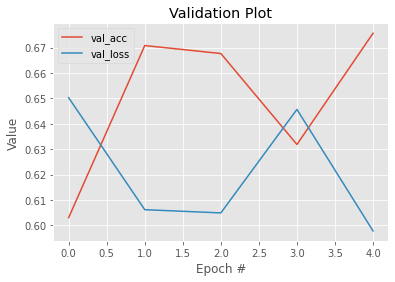

In [ ]:
# Hasil pengerjaan point 4.1

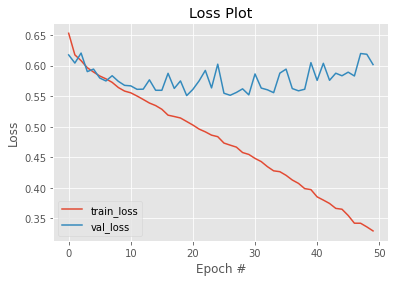

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

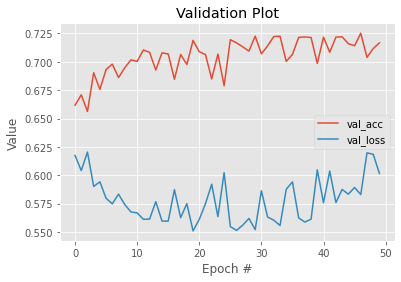

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["val_acc"], label="val_acc")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.title("Validation Plot")
plt.xlabel("Epoch #")
plt.ylabel("Value")
plt.legend()
plt.show()

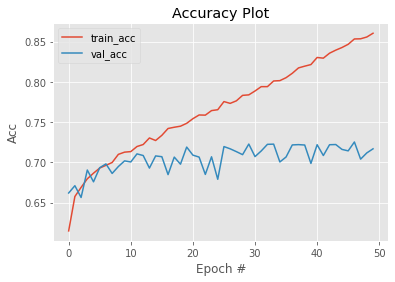

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [ ]:
# Hasil pengerjaan point 4.2
from sklearn.metrics import classification_report

pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))

              precision    recall  f1-score   support

           0       0.73      0.68      0.71      4134
           1       0.70      0.75      0.73      4134

    accuracy                           0.72      8268
   macro avg       0.72      0.72      0.72      8268
weighted avg       0.72      0.72      0.72      8268

